<a href="https://colab.research.google.com/github/siddharth-69/Automated-essay-scoring/blob/master/Automated_essay_scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automated essay scoring using Random Forest

In [0]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df=pd.read_csv('training_set_rel3.tsv',sep='\t',nrows=1785,usecols=['essay','rater1_domain1','rater2_domain1'],error_bad_lines=True,encoding = "ISO-8859-1")
print(df.tail())

                                                  essay  rater1_domain1  \
1780  My opinion is that people should have computer...               4   
1781  Dear readers, I think that its good and bad to...               1   
1782  Dear - Local Newspaper I agree thats computers...               4   
1783  Certain materials being removed from libraries...               4   
1784  Write a persuasive essay to a newspaper reflec...               1   

      rater2_domain1  
1780               4  
1781               1  
1782               3  
1783               4  
1784               2  


# Text representation

The text in each essay has to be translated into an array known as the bag of words model.This is called feature extraction of the text and this array is used as features to predict a score for the given essay.

In [0]:
#dividing_the_dataset_for_training_and_testing
train_X=df[:1500]['essay']
train_y1=df[:1500]['rater1_domain1']
train_y2=df[:1500]['rater2_domain1']
test_Y=df[1500:]['essay']
test_y1=df[1500:]['rater1_domain1']
test_y2=df[1500:]['rater2_domain1']

vectorizer1=CountVectorizer(min_df=1)
X = vectorizer1.fit_transform(train_X).toarray()  #this_array_will_act_as_a_features_of_essays



# Classification using Random Forest

In [39]:
#trainig
clf1=RandomForestRegressor()
clf2=RandomForestRegressor()

model1=clf1.fit(X,train_y1)
model2=clf1.fit(X,train_y2)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
#testing

predict_score1=vectorizer1.transform(test_Y).toarray()
predict_score2=vectorizer1.transform(test_Y).toarray()
s1=model1.predict(predict_score1)
s2=model2.predict(predict_score2)
final_score=np.round(s1+s2)


In [43]:
print(s1)
print(s2)

print(final_score)

[4.3 4.  3.9 3.3 4.8 4.7 4.  4.  3.1 4.3 4.6 4.4 4.1 4.5 4.  4.  4.  4.6
 4.2 4.  4.1 4.3 3.8 3.6 3.9 4.2 4.3 4.1 3.6 4.2 4.  3.1 4.  4.3 4.6 4.4
 3.4 4.9 3.8 3.9 3.9 4.3 3.6 4.  3.8 4.2 5.  4.  4.  4.  1.8 4.3 4.2 4.4
 4.  4.2 4.2 3.1 3.8 3.9 4.2 4.2 5.3 3.4 3.5 4.9 4.  4.1 4.6 4.3 4.4 4.1
 4.2 4.2 4.1 3.9 5.2 4.4 4.3 4.  4.9 3.6 4.1 4.4 4.8 4.6 4.3 1.6 4.3 4.2
 4.2 4.3 5.1 4.2 4.2 4.5 4.1 4.5 3.6 3.9 4.1 4.4 4.4 4.7 4.3 5.3 4.1 4.4
 4.3 4.5 4.2 5.4 4.1 3.9 4.3 4.1 4.2 5.1 4.3 4.5 3.7 4.  4.1 4.2 4.3 4.9
 4.1 4.1 3.8 4.7 4.1 4.6 4.  4.1 4.5 4.1 4.1 4.8 4.5 4.2 5.4 4.3 3.2 4.6
 4.2 4.2 4.3 3.7 4.2 4.1 3.3 4.  3.9 4.  4.6 4.4 4.3 4.2 4.4 4.  5.  4.2
 4.1 4.1 5.2 4.1 5.  3.2 2.1 4.3 4.3 3.8 4.4 4.  4.  4.2 3.9 4.2 3.9 3.9
 4.7 3.  5.1 4.2 3.2 4.3 4.6 4.8 4.5 4.6 4.5 4.3 4.3 4.3 4.7 5.1 3.9 3.9
 4.9 4.4 4.6 3.2 4.  3.1 4.1 4.1 4.  4.6 4.1 3.7 4.6 4.3 4.6 4.2 4.9 4.8
 4.3 4.2 4.1 4.8 4.2 4.5 4.5 4.6 4.8 4.3 4.  4.2 3.7 4.9 4.  4.9 4.  4.2
 5.1 4.4 4.1 3.8 4.  4.4 4.7 4.1 3.6 4.4 2.3 4.1 4.

In [35]:
actual_final_score=np.array(test_y1)+np.array(test_y2)
print(actual_final_score)

[ 9  8  9  8  8  8  7  8  5  8 10  8  8 10  8  9  8 10  8  6  8 10 10  6
  8  8  8  6  6  9  6  4  8  9  9  8  8 10  8 10  8 10  7  8  6  8  9  6
  7  8  2  8  8  8  7  9  9  4  6  8  8  8 11  7  5 11  7  8 10  8  9  8
  8  9  8  8 11 10  8  9  9  7 10 10 10 11  9  2 10  8  8  9 11 10  9  8
  8 10  8  8  8  9  9  8  9 11  8  8  9  9  9  9  8  8  9  7 10 10  9  8
  8  8  8 10 10 10  8  8  8  8 10 10  8  8 10  8  8  8 11  8 11  8  6 11
  9  8  9  8  8  9  8  8  8  9  9  8 10  8  9  8  9  9 10  9 10  9 11  6
  5  8 11  8 10  8  8  8  6  8  7  8  8  5 10  8  7  9 11  9 10 10  9  9
  8  8  8  9  8  8 11  8 12  6  7  7  8  9  6  9  8  6 10  7  8  9  8 11
  9  9  9 10  9  9 10  9  8 10  9  8  8  9  7 11  8  7 10  8  8  6  9 11
 10 10  8  9  6  8  8  9  8 10  8 10  8 10 10 12  8  8 12  8  5  8  9  8
  9 10  8 10  8 10  9  9 11  5 10  9 10  8  8  7  8  2  7  8  3]


# Analysing our prediction

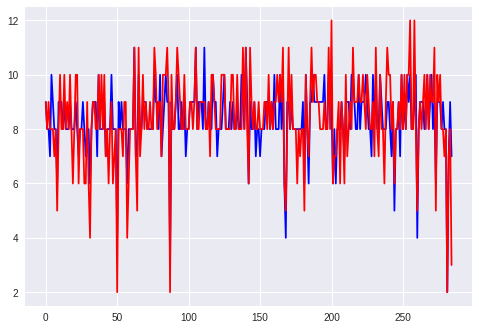

In [44]:
plt.plot(final_score,color='b')
plt.plot(actual_final_score,color='r')
plt.show()

# Calculating Total Error

In [47]:
n=len(test_Y) ##number_of_obseervations
total_squared_error=np.sum(np.square(final_score-actual_final_score))
average_squared_error=total_squared_error/n
print(average_squared_error)

1.080701754385965


# Conclusion
Our model is working pretty well with an average squared error of only 1.08.